In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
X_train = np.load('../data/X_train.npy', allow_pickle = True)
X_test = np.load('../data/X_test.npy', allow_pickle = True)
y_train = np.load('../data/y_train.npy', allow_pickle = True)
y_test = np.load('../data/y_test.npy', allow_pickle = True)

In [3]:
!pip3 install -U imbalanced-learn

In [4]:
## smote to balance the data

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [5]:
X_test, y_test = sm.fit_resample(X_test, y_test)

In [6]:
model = Sequential()

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [7]:
history = model.fit(x = X_train, y = y_train, epochs = 200, validation_data = (X_test, y_test), callbacks = [early_stop])

2022-11-29 16:53:40.917298: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/200
11339/11339 [==============================] - 206s 18ms/step - loss: 0.8422 - accuracy: 0.6689 - val_loss: 0.7703 - val_accuracy: 0.7007
Epoch 2/200
11339/11339 [==============================] - 202s 18ms/step - loss: 0.7502 - accuracy: 0.7085 - val_loss: 0.7222 - val_accuracy: 0.7202
Epoch 3/200
11339/11339 [==============================] - 199s 18ms/step - loss: 0.7365 - accuracy: 0.7133 - val_loss: 0.7151 - val_accuracy: 0.7282
Epoch 4/200
11339/11339 [==============================] - 202s 18ms/step - loss: 0.7289 - accuracy: 0.7162 - val_loss: 0.7067 - val_accuracy: 0.7271
Epoch 5/200
11339/11339 [==============================] - 207s 18ms/step - loss: 0.7229 - accuracy: 0.7190 - val_loss: 0.7140 - val_accuracy: 0.7161
Epoch 6/200
11339/11339 [==============================] - 196s 17ms/step - loss: 0.7191 - accuracy: 0.7203 - val_loss: 0.7049 - val_accuracy: 0.7281
Epoch 7/200
11339/11339 [==============================] - 197s 17ms/step - loss: 0.7152 - accuracy:

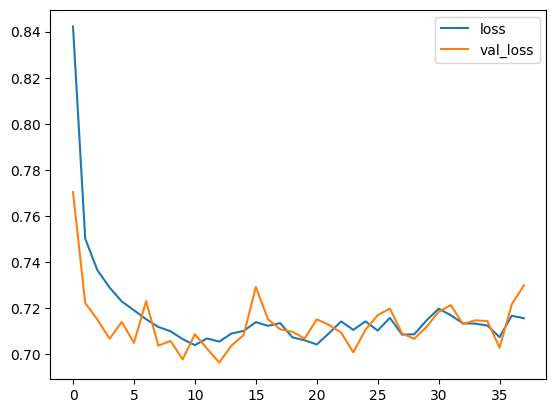

In [8]:
losses = pd.DataFrame(model.history.history)
losses[['loss', 'val_loss']].plot()
plt.show()

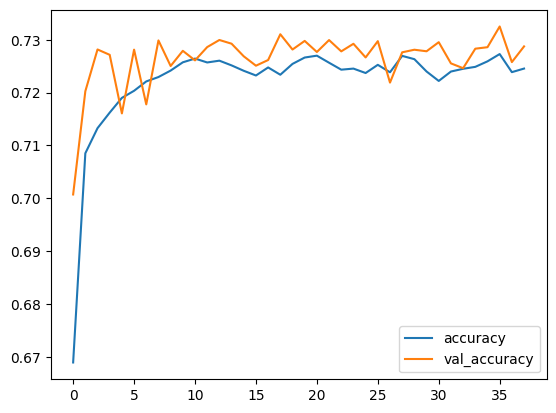

In [9]:
losses[['accuracy', 'val_accuracy']].plot()
plt.show()

In [10]:
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']


In [11]:
preds = model.predict(X_train)

11339/11339 [==============================] - 8s 658us/step


In [12]:
print(preds[0])

[6.0860019e-02 7.8603487e-05 9.2731291e-01 1.2595456e-03 1.0488848e-02]


In [13]:
print(np.sum(preds[0]))

0.99999994


In [14]:
matrix = confusion_matrix(y_train.argmax(axis=1), preds.argmax(axis=1))

In [15]:
matrix

array([[43196,  9129,  4756,  4601, 10884],
       [ 1671, 70069,   296,   104,   426],
       [  658,   145, 69599,  1683,   481],
       [ 1212,  2588,   247, 61479,  7040],
       [16867,  9774,  2621, 18811, 24493]])

In [16]:
print(classification_report(y_train.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.68      0.60      0.63     72566
           1       0.76      0.97      0.85     72566
           2       0.90      0.96      0.93     72566
           3       0.71      0.85      0.77     72566
           4       0.57      0.34      0.42     72566

    accuracy                           0.74    362830
   macro avg       0.72      0.74      0.72    362830
weighted avg       0.72      0.74      0.72    362830



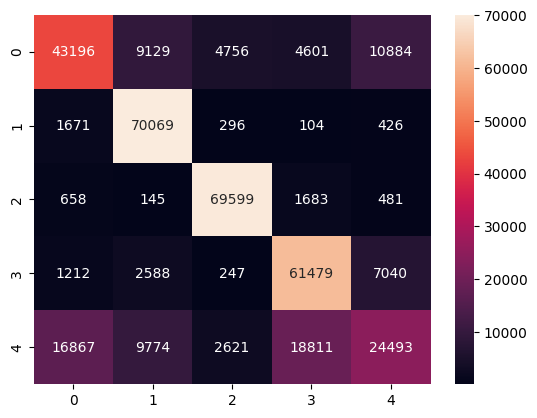

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(matrix, annot = True, fmt = 'd')
plt.show()

## For the testing dataset

In [18]:
preds = model.predict(X_test)

5561/5561 [==============================] - 4s 711us/step


In [19]:
print(preds[0])

[7.4459583e-02 3.6973690e-04 8.9333910e-01 6.5002027e-03 2.5331357e-02]


In [20]:
print(np.sum(preds[0]))

1.0


In [21]:
matrix = confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1))

In [22]:
matrix

array([[21004,  4641,  2418,  2294,  5229],
       [ 1637, 32965,   353,    72,   559],
       [  421,   115, 34069,   617,   364],
       [  620,  1627,   138, 29731,  3470],
       [ 8288,  4948,  1367,  9088, 11895]])

In [23]:
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.66      0.59      0.62     35586
           1       0.74      0.93      0.83     35586
           2       0.89      0.96      0.92     35586
           3       0.71      0.84      0.77     35586
           4       0.55      0.33      0.42     35586

    accuracy                           0.73    177930
   macro avg       0.71      0.73      0.71    177930
weighted avg       0.71      0.73      0.71    177930



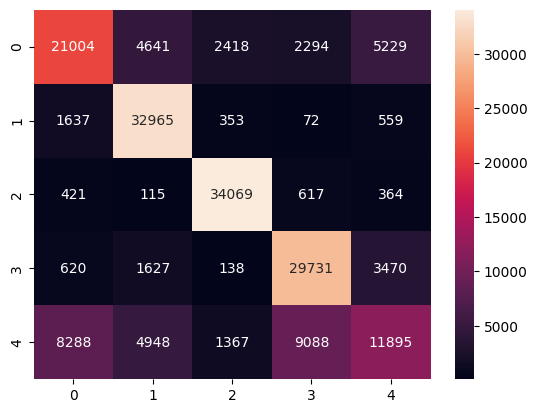

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(matrix, annot = True, fmt = 'd')
plt.show()